In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [63]:
def logistic_regression_analysis(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list)->None:
  """_summary_

  Args:
      df (_type_): _description_
  """
  
  
  
  logistic_regression = LogisticRegression()

  logistic_regression.fit(X_train, y_train)

  y_predictions = logistic_regression.predict(X_test)
  
  accuracy = accuracy_score(y_test,y_predictions)
  
  print(classification_report(y_test,y_predictions))

  print(f"The Accuracy: {accuracy}")

In [43]:
df = pd.read_csv("apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [44]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop("A_id", axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


In [46]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [47]:
df["Quality"].unique()

array(['good', 'bad'], dtype=object)

In [49]:
df["Quality"] = df["Quality"].apply(lambda x: 1 if x== "good" else 0)

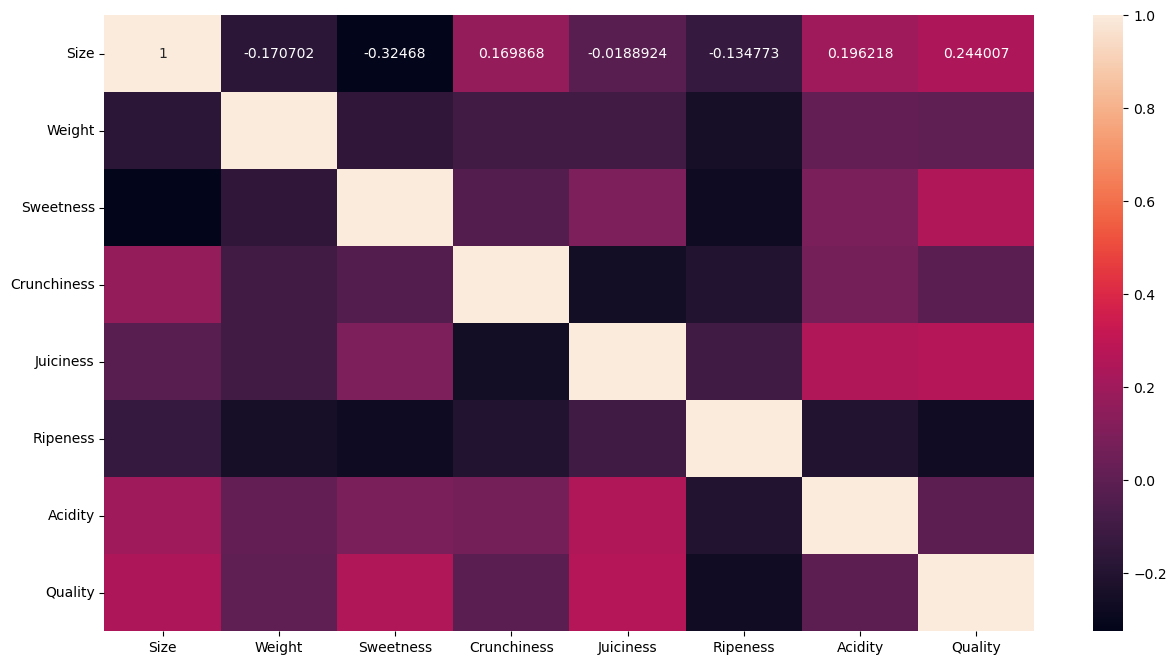

In [50]:
relations = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(relations, annot=True, fmt="g")
plt.show()

<Axes: xlabel='Weight', ylabel='Ripeness'>

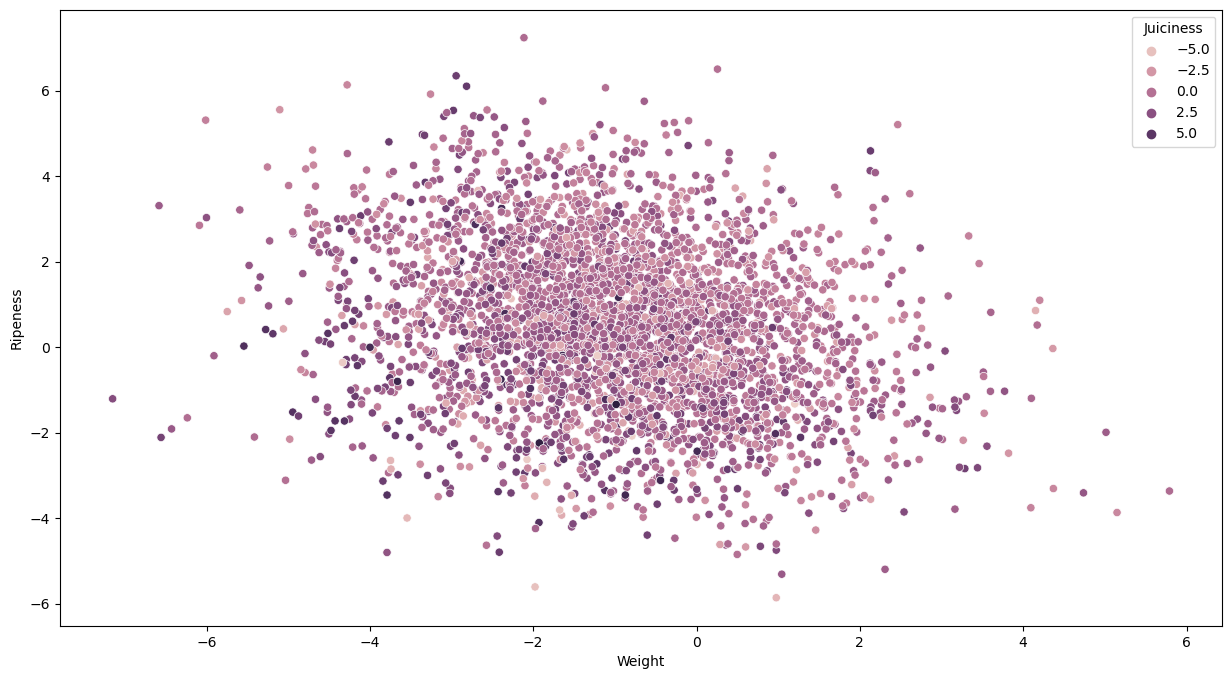

In [51]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Weight", y ="Ripeness", data = df, hue ="Juiciness")

<Axes: xlabel='Weight', ylabel='Size'>

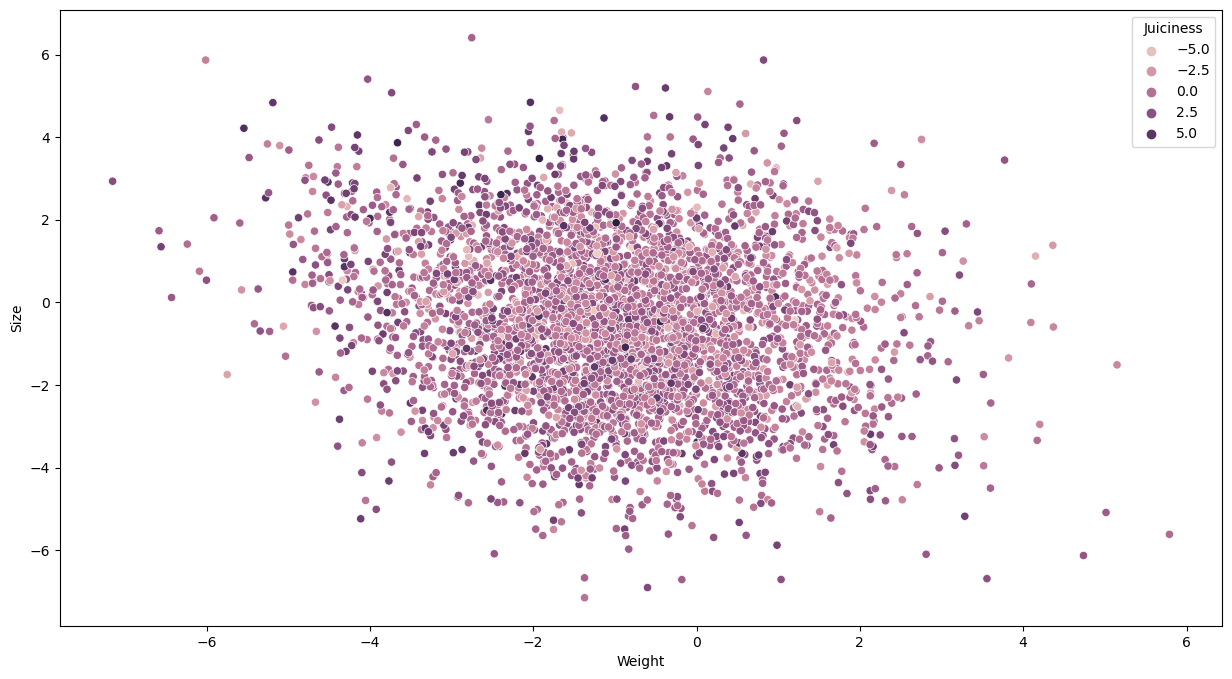

In [52]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Weight", y ="Size", data = df, hue ="Juiciness")

<Axes: xlabel='Juiciness', ylabel='Ripeness'>

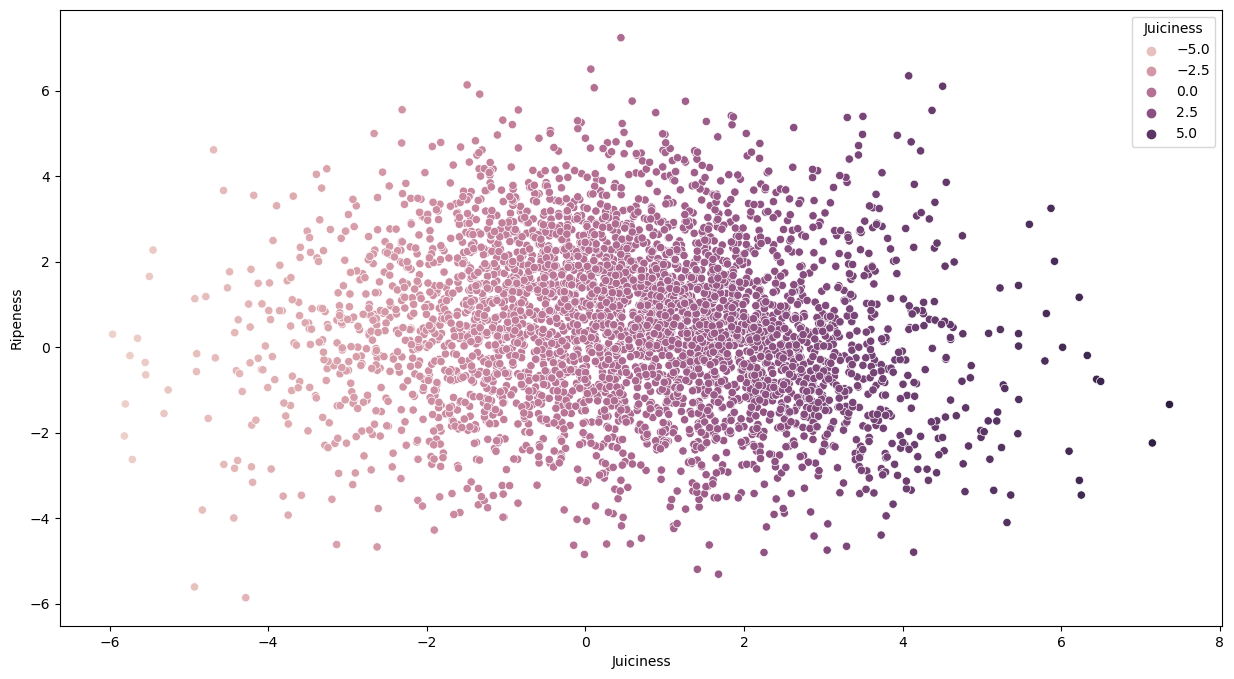

In [54]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Juiciness", y ="Ripeness", data = df, hue ="Juiciness")

<Axes: xlabel='Juiciness', ylabel='Sweetness'>

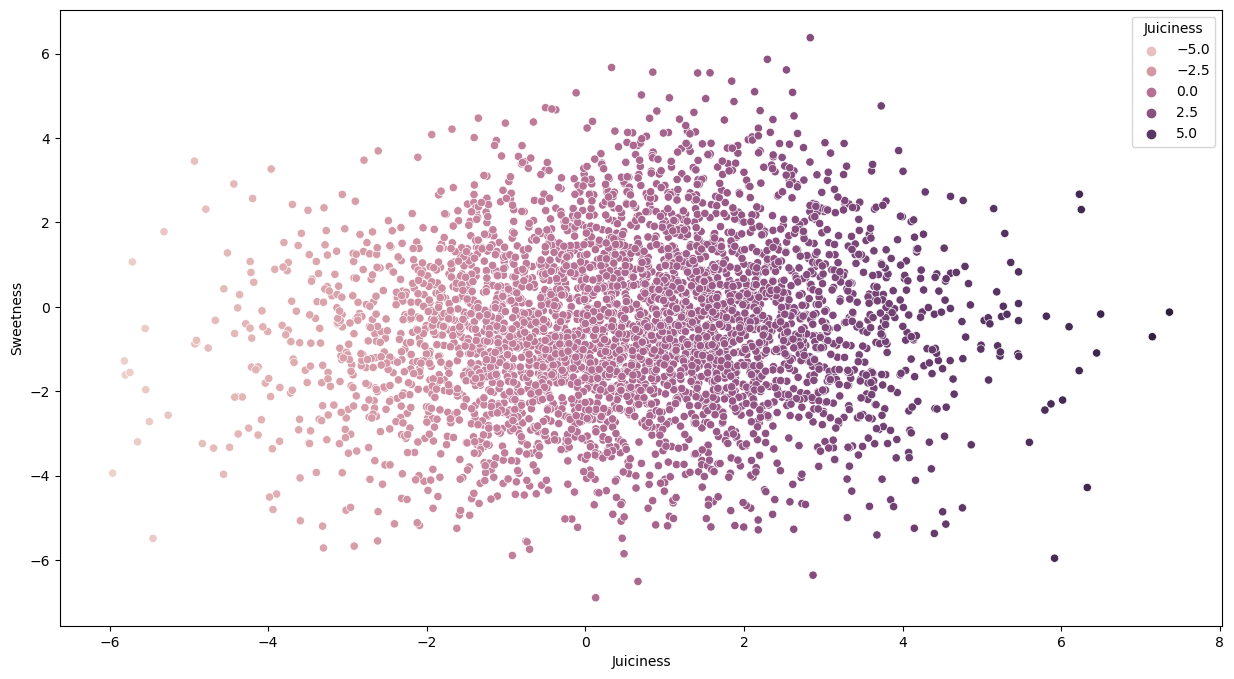

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Juiciness", y ="Sweetness", data = df, hue ="Juiciness")

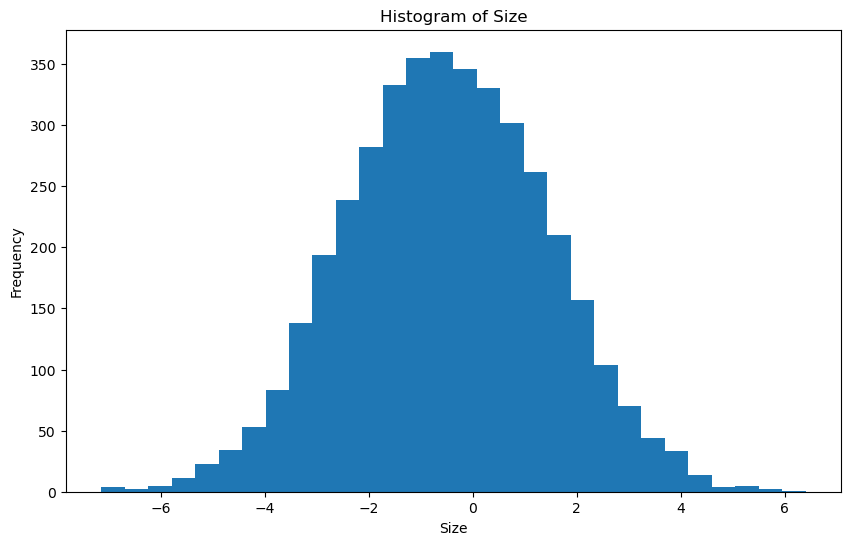

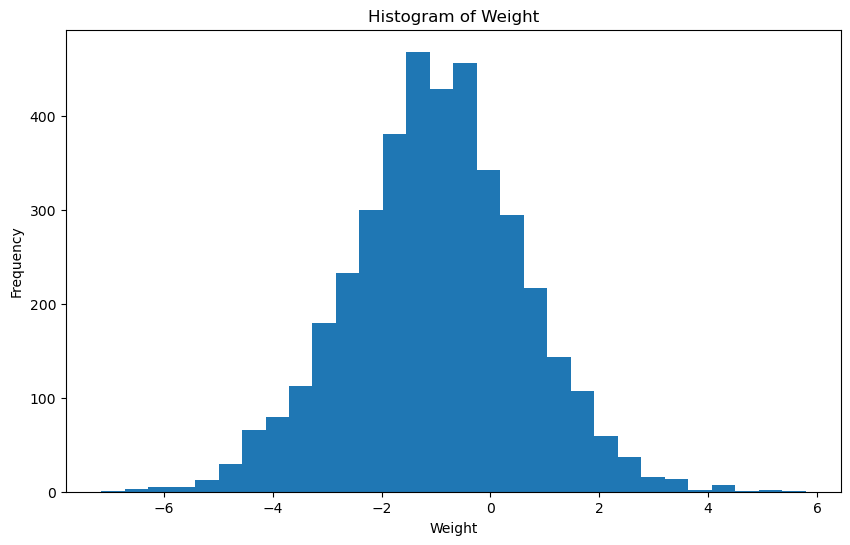

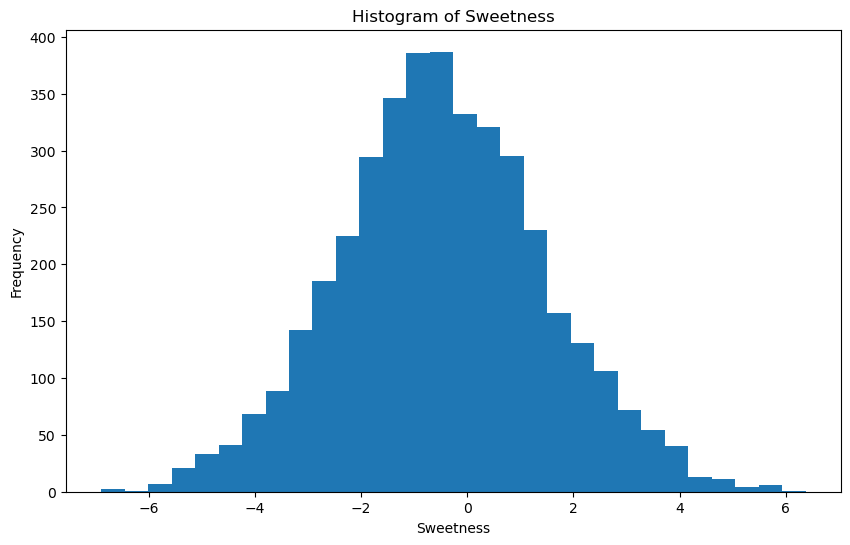

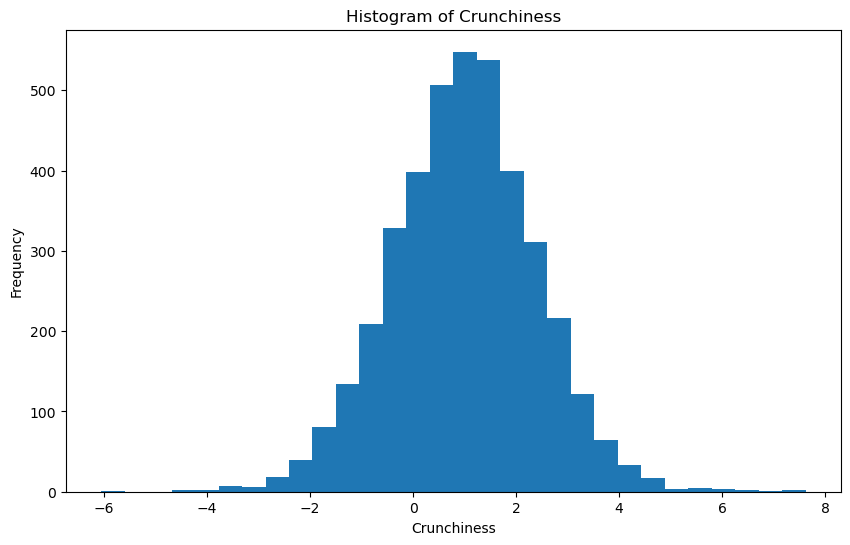

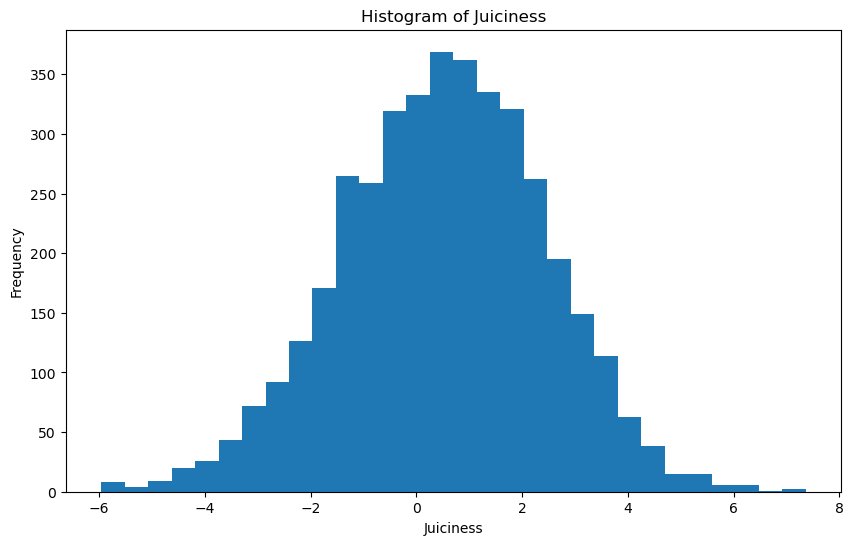

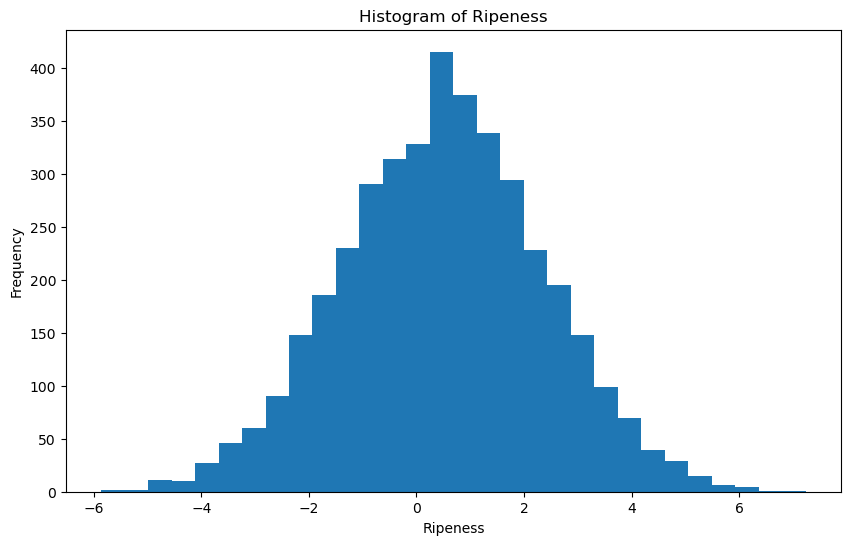

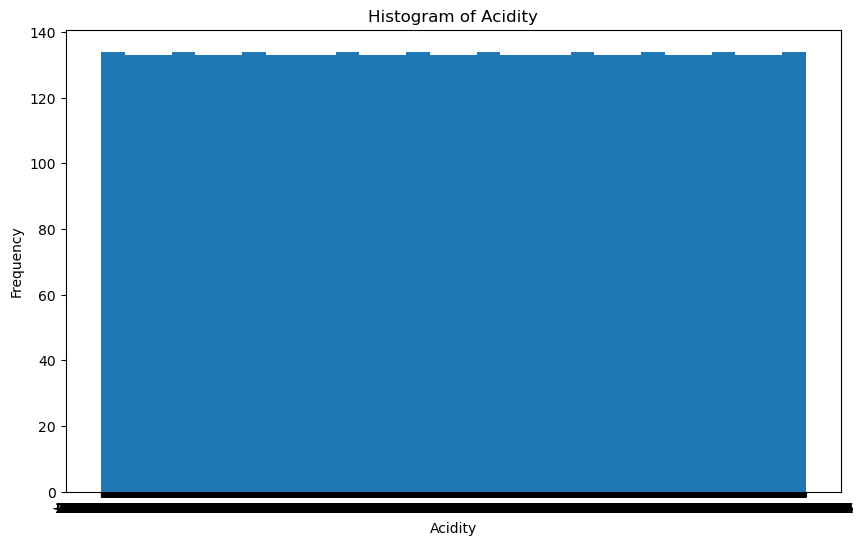

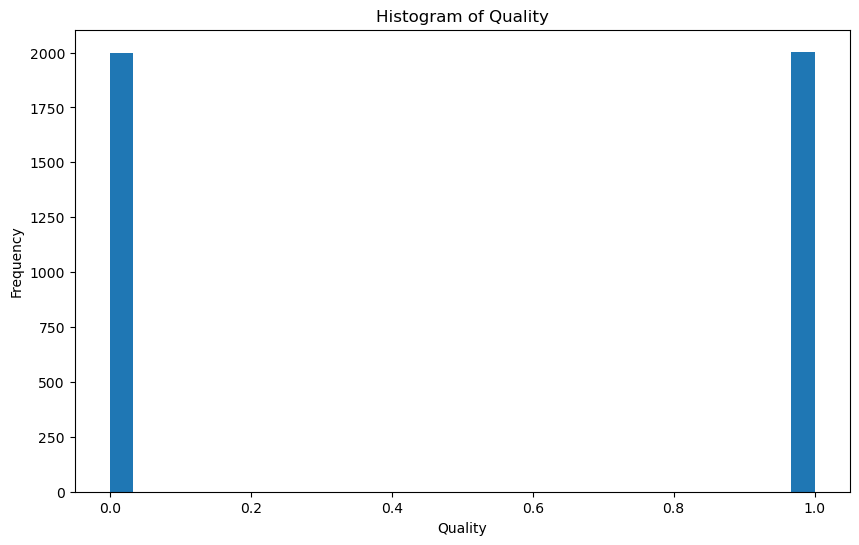

In [56]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [64]:
X, y = df.drop("Quality",axis =1), df["Quality"]

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X), standard_scaler.fit_transform(X_test)

logistic_regression_analysis(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       593
           1       0.75      0.76      0.76       607

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

The Accuracy: 0.7525


In [65]:
X, y = df.drop("Quality",axis =1), df["Quality"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_standard_scaled, X_test_standard_scaled = min_max_scaler.fit_transform(X), min_max_scaler.fit_transform(X_test)

logistic_regression_analysis(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       593
           1       0.75      0.76      0.76       607

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

The Accuracy: 0.7525
